# Choppies Competition

## Choppies, Spar and Pick 'n Pay

In [ ]:
#load choppies data
choppies <- read.csv("choppies.csv")
str(choppies)


In [ ]:
#load picknpay data
picknpay <- read.csv("picknpay.csv")
str(picknpay)

In [ ]:
#load spar data
spar <- read.csv("spar.csv")
str(spar)

In [4]:
merged_stores <- rbind(choppies, picknpay, spar)

In [5]:
str(merged_stores)

'data.frame':	154 obs. of  10 variables:
 $ Name      : chr  "Choppies Bobonong" "Choppies Letlhakane" "Choppies Mahalapye" "Choppies Mahalapye" ...
 $ District  : chr  "Central" "Central" "Central" "Central" ...
 $ Town      : chr  "Bobonong" "Letlhakane" "Mahalapye" "Mahalapye" ...
 $ Address   : chr  "Moilamba Ward,Cash Bazaar building" "Nkosho Ward,Letlhakane" "Plot 6042, Main Mall, Mahalapye" "Watershed Mall, A1,  Mahalapye" ...
 $ latitude  : num  -22 -21.4 -23.1 -23.1 NA ...
 $ longitude : num  28.4 25.6 26.8 26.8 NA ...
 $ Date      : chr  "12/09/2012" "12/10/2007" "13/01/2012" "" ...
 $ Cancelled : chr  NA NA NA NA ...
 $ Registered: chr  "Y" "Y" "Y" "Y" ...
 $ Store     : chr  "choppies" "choppies" "choppies" "choppies" ...


Converting variables to correct data type

In [6]:
names(merged_stores) <- tolower(names(merged_stores))
merged_stores$district <- factor(merged_stores$district)
merged_stores$date <- as.Date(merged_stores$date, "%d/%m/%Y")
merged_stores$year <- as.numeric(format(merged_stores$date, "%Y"))
str(merged_stores)

'data.frame':	154 obs. of  11 variables:
 $ name      : chr  "Choppies Bobonong" "Choppies Letlhakane" "Choppies Mahalapye" "Choppies Mahalapye" ...
 $ district  : Factor w/ 14 levels "Central","Chobe",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ town      : chr  "Bobonong" "Letlhakane" "Mahalapye" "Mahalapye" ...
 $ address   : chr  "Moilamba Ward,Cash Bazaar building" "Nkosho Ward,Letlhakane" "Plot 6042, Main Mall, Mahalapye" "Watershed Mall, A1,  Mahalapye" ...
 $ latitude  : num  -22 -21.4 -23.1 -23.1 NA ...
 $ longitude : num  28.4 25.6 26.8 26.8 NA ...
 $ date      : Date, format: "2012-09-12" "2007-10-12" ...
 $ cancelled : chr  NA NA NA NA ...
 $ registered: chr  "Y" "Y" "Y" "Y" ...
 $ store     : chr  "choppies" "choppies" "choppies" "choppies" ...
 $ year      : num  2012 2007 2012 NA 2012 ...


In [7]:
summary(merged_stores)

     name                 district      town             address         
 Length:154         South-East:59   Length:154         Length:154        
 Class :character   Central   :29   Class :character   Class :character  
 Mode  :character   Kweneng   :22   Mode  :character   Mode  :character  
                    North-East:12                                        
                    Southern  :10                                        
                    North-West: 6                                        
                    (Other)   :16                                        
    latitude        longitude          date             cancelled        
 Min.   :-26.02   Min.   :21.64   Min.   :1994-09-23   Length:154        
 1st Qu.:-24.66   1st Qu.:25.58   1st Qu.:2010-04-08   Class :character  
 Median :-24.60   Median :25.89   Median :2013-06-27   Mode  :character  
 Mean   :-23.41   Mean   :25.88   Mean   :2012-07-04                     
 3rd Qu.:-21.97   3rd Qu.:26.35   3rd 

## Choppies Market Share

In [ ]:
library(dplyr)
library(ggplot2)
library(viridis)
library(rnaturalearth)
library(rnaturalearthhires)
library(plotly)

### The number of stores owned by choppies vs other major stores

In [9]:
merged_stores %>%
group_by(store) %>%
summarise(count = n()) %>%
mutate(percent = round(100*count/sum(count), 2))

store,count,percent
<chr>,<int>,<dbl>
choppies,108,70.13
picknpay,12,7.79
spar,34,22.08


#### Number of Stores in Gaborone

In [10]:
merged_stores %>%
filter(town == "Gaborone") %>%
group_by(store) %>%
summarise(count = n()) %>%
mutate(percent = round(100*count/sum(count), 2))

store,count,percent
<chr>,<int>,<dbl>
choppies,28,68.29
picknpay,5,12.20
spar,8,19.51


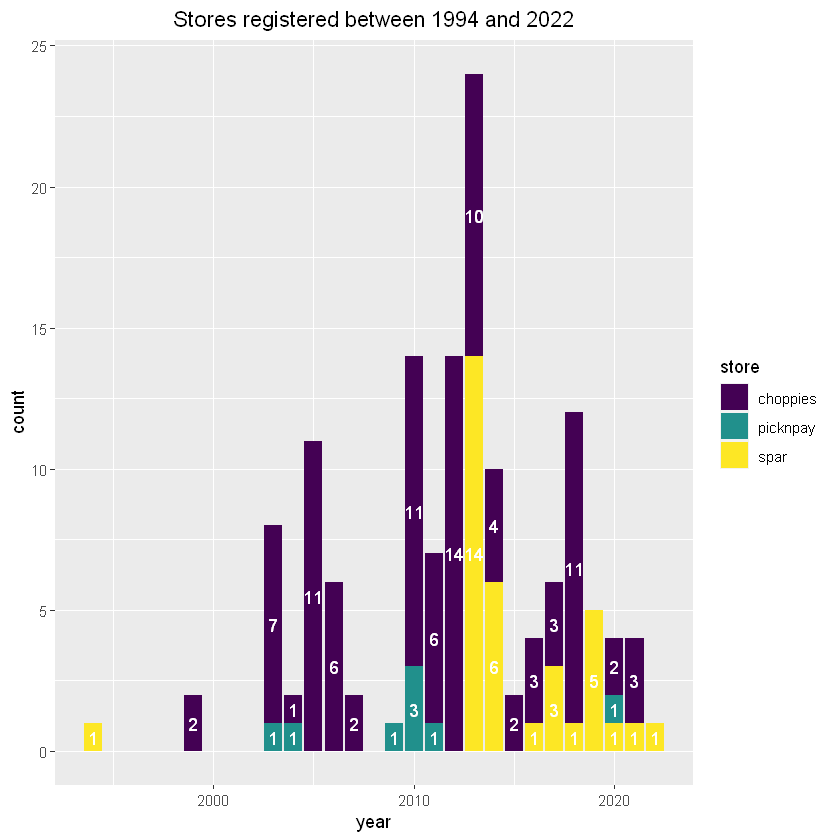

In [11]:
merged_stores %>%
filter(!is.na(year)) %>%
ggplot(aes(year, fill = store)) +
geom_bar() + 
ggtitle("Stores registered between 1994 and 2022") +
theme(plot.title = element_text(hjust = 0.5)) +
geom_text(aes(label = after_stat(count)), stat = "count",
         position = position_stack(vjust = 0.5),
         color = "white") + 
scale_fill_viridis(discrete = TRUE)

In [ ]:
df <- merged_stores %>%
filter(!is.na(year), !is.na(latitude), !is.na(latitude))
summary(df)

In [ ]:
library(rnaturalearth)
library(rnaturalearthhires)

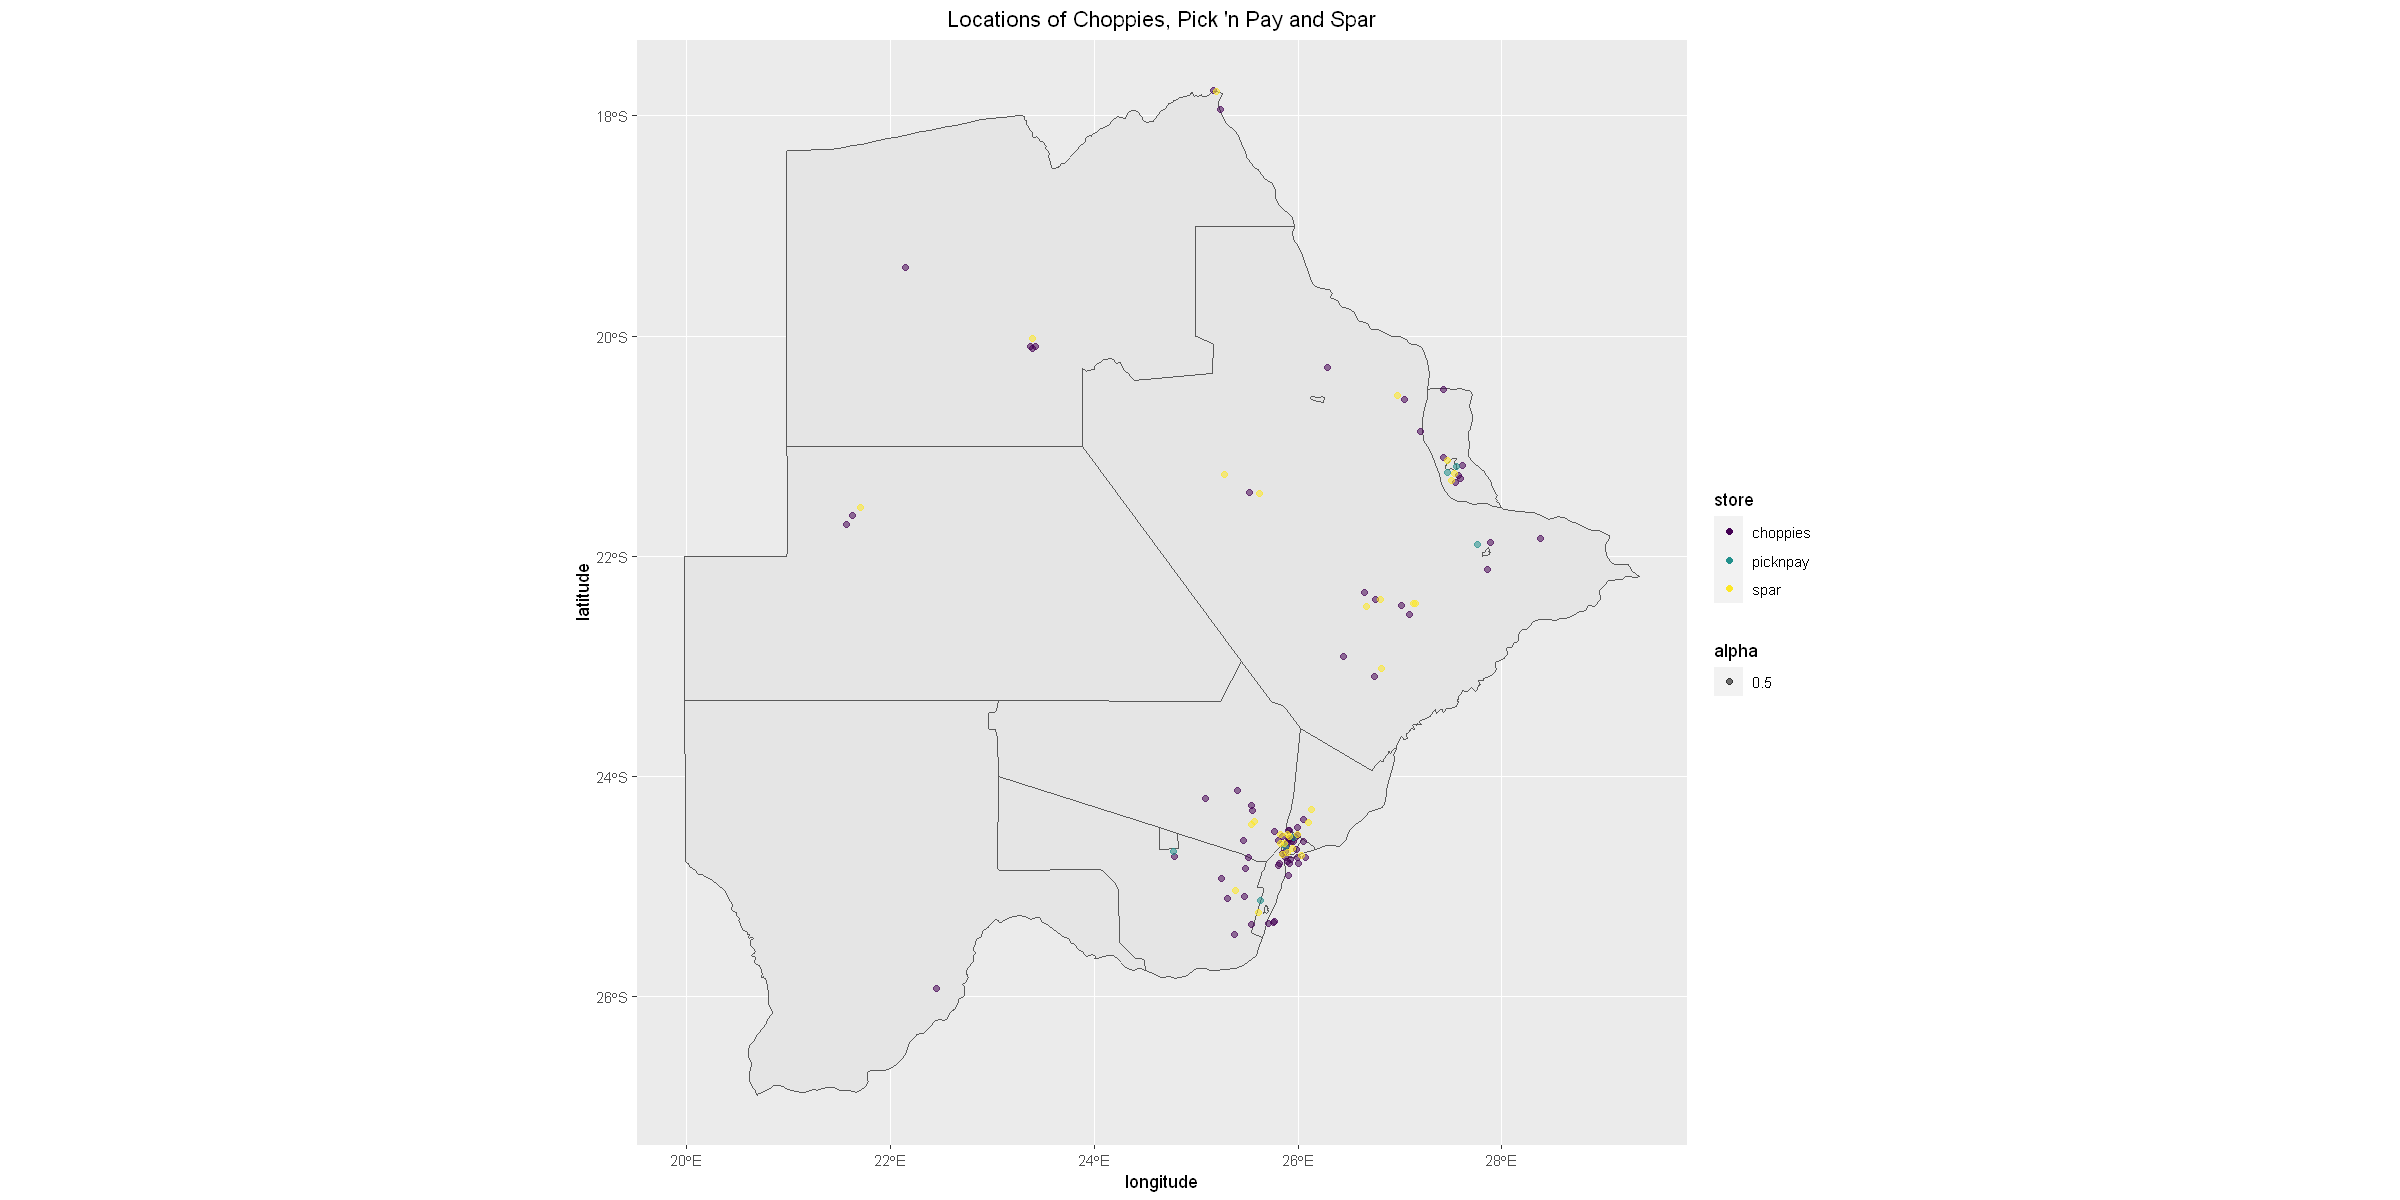

In [20]:
options(repr.plot.width=20, repr.plot.height=10)
BW <- ne_states(country = 'botswana', returnclass = 'sf')
set.seed(3)
ggplot(data = BW) + geom_sf() +
geom_jitter(data = df, 
           mapping=aes(x = longitude, y = latitude, 
               colour = store, alpha = 0.5), 
            width = 0.1, height = 0.15) +
ggtitle("Locations of Choppies, Pick 'n Pay and Spar") +
theme(plot.title = element_text(hjust = 0.5)) +
scale_color_viridis_d()

#ggplot(g)

In [21]:
library(gganimate)
library(gifski)

In [22]:
num_years <- max(df$year) - min(df$year) + 1

map_data <- ggplot(BW) + geom_sf() +
geom_jitter(data = df, 
            mapping = aes(x = longitude, 
                        y = latitude, color = store,
                         alpha = 0.5, group = year), 
            width = 0.1, height = 0.15) +
scale_color_viridis(discrete = TRUE)

map_with_animation <- map_data +
transition_time(year) +
ggtitle("Stores registered in {frame_time}") +
theme(plot.title = element_text(hjust = 0.5))

map_with_animation <- map_with_animation +
shadow_mark()

animate(map_with_animation, nframes = num_years, fps = 1)

#save the gif
anim_save("stores_registered.gif")
